# Perkenalan

Nama: Aumedi Wibisana Pratama Subagyo \
Batch: RMT-025

Manusia telah bertaruh bahkan sejak zaman Romawi kuno. Masyarakat Romawi saling bertaruh kekayaan mereka pada petarung-petarung gladiator di koloseum, layaknya masyarakat sekitar bertaruh pada tim sepak bola favorit mereka ketika pertandingan. Pengetahuan orang-orang terhadap aspek-aspek subjek petanding (tim sepak bola maupun gladiator) seperti background, track-record, intensitas latihan, dan jumlah menang-kalah dapat membuat mereka yakin apakah petanding tersebut akan memenangkan pertandingan. Mereka membuat prediksi apakah petanding akan menang atau tidak, berdasarkan informasi-informasi tersebut. Pada notebook ini akan disetup sebuah model machine learning untuk memprediksi apakah seorang petarung gladiator akan berhasil bertahan-hidup pada pertarungan berikutnya. \

Informasi-informasi pada dataset diberikan sebagai berikut, \
-`Name`: Nama gladiator \
-`Age`: Umur gladiator (dalam tahun) \
-`Birth Year`: Tahun lahir gladiator \
-`Origin`: Daerah asal gladiator \
-`Height`: Tinggi gladiator (dalam cm)\
-`Weight`: Berat badan gladiator (dalam kilogram) \
-`Category`: Jenis gladiatornya, mengindikasikan gaya bertarung dan peralatannya \
-`Wins`: Total jumlah menang yang telah dicapai gladiator \
-`Losses`: Total jumlah kalah yang telah dialami gladiator\
-`Special Skills`: Kemampkuan unik yang dimiliki gladiatornya\
-`Weapon of Choice`: Senjata pilihan gladiator \
-`Patron's Wealth`: Status kekayaan sponsor gladiator \
-`Equipment Quality`: Kualitas dan kondisi peralatan gladiator \
-`Public Favor`: Popularitas gladiator ke masyarakat publik \
-`Injury History`: Catatan cedera yang diderita gladiator \
-`Mental Resilience`: Kemampuan gladiator untuk menahan stress dan tekanan psikologi \
-`Diet and Nutrition`: Kebiasaan makan dan nutrisi gladiator \
-`Tactical Knowledge`: Pengetahuan gladiator tentang taktik pertarungan \
-`Allegiance Network`: Jaringan sekutu-sekutu dan pendukung gladiator \
-`Battle Experience`: Jumlah pengalaman yang dimiliki gladiator dalam pertarungan \
-`Psychological Profile`: Sebuah asesmen kesehatan mental gladiator dan kepribadiannya \
-`Health Status`: Kondisi kesehatan gladiator saat ini \
-`Personal Motivation`: Faktor utama yang memotivasi gladiator \
-`Previous Occupation`: Profesi individu sebelum menjadi gladiator \
-`Training Intensity`: Tingkatan intensitas latihan gladiator \
-`Battle Strategy`: Strategi yang disukai oleh gladiator \
-`Social Standing`: Status sosial gladiator \
-`Crowd Appeal Techniques`: Teknik yang digunakan gladiator untuk menarik perhatian massa \
-`Survived`: Mengindikasikan apakah gladiatornya akan bertahan-hidup. \

Yang menjadi label di sini adalah `Survived`. Akan ada beberapa fitur yang tidak digunakan. Model klasifikasi yang telah disetup di sini kemudian akan dibungkus menjadi sebuah pipeline. Pipeline akan disave dan model akan dideploy ke HuggingFace agar user dapat tahu apakah sebaiknya bertaruh pada gladiator tertentu atau tidak.

Dataset diperoleh dari kaggle: \
https://www.kaggle.com/datasets/anthonytherrien/gladiator-combat-records-and-profiles-dataset

# Import Libraries

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Data Loading

File .csv dataset cukup besar, sehingga loading data dilakukan melalui mounting dari Google Drive pribadi.

In [2]:
# Loading data dari Gdrive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/sampledb/gladiator_data.csv')
df.head(10)

Mounted at /content/drive


,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Cosconius Hostius,42,8,Gaul,176,54,Hoplomachus,10,2,Novice,...,12,Stoic,Good,Glory,Laborer,Medium,Balanced,Low,Flamboyant,True
1,Caecilius Valerius,30,20,Greece,173,67,Provocator,6,0,Agility,...,6,Aggressive,Excellent,Freedom,Laborer,Medium,Aggressive,High,Intimidating,False
2,Sempronius Aulus,30,20,Gaul,171,81,Hoplomachus,8,4,Endurance,...,12,Calculative,Excellent,Wealth,Unemployed,Medium,Balanced,Medium,Charismatic,True
3,Lacerius Laberius,32,18,Rome,172,72,Retiarius,8,3,Novice,...,11,Stoic,Excellent,Freedom,Unemployed,Medium,Aggressive,High,Humble,True
4,Blaesus Modius,29,21,Gaul,177,87,Secutor,12,5,Tactics,...,17,Stoic,Good,Survival,Entertainer,Medium,Balanced,Medium,Humble,True
5,Hortensius Gaius,23,27,Gaul,158,77,Murmillo,7,1,Speed,...,8,Fearful,Excellent,Wealth,Soldier,Medium,Aggressive,Medium,Intimidating,True
6,Lollius Nasennius,43,7,Greece,168,74,Hoplomachus,7,1,Agility,...,8,Stoic,Good,Vengeance,Unemployed,Low,Aggressive,Low,Intimidating,True
7,Gaius Caninius,36,14,Rome,185,62,Secutor,13,8,Novice,...,21,Fearful,Good,Wealth,Unemployed,Low,Balanced,Medium,Intimidating,True
8,Petreius Memmius,33,17,Thrace,186,50,Provocator,7,0,Strength,...,7,Stoic,Excellent,Wealth,Entertainer,Medium,Aggressive,High,Intimidating,True
9,Numerius Sextus,32,18,Greece,171,56,Provocator,8,1,Tactics,...,9,Fearful,Excellent,Wealth,Criminal,Medium,Defensive,High,Charismatic,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737570 entries, 0 to 737569
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Name                     737570 non-null  object 
 1   Age                      737570 non-null  int64  
 2   Birth Year               737570 non-null  int64  
 3   Origin                   737570 non-null  object 
 4   Height                   737570 non-null  int64  
 5   Weight                   737570 non-null  int64  
 6   Category                 737570 non-null  object 
 7   Wins                     737570 non-null  int64  
 8   Losses                   737570 non-null  int64  
 9   Special Skills           737570 non-null  object 
 10  Weapon of Choice         737570 non-null  object 
 11  Patron Wealth            737570 non-null  object 
 12  Equipment Quality        737570 non-null  object 
 13  Public Favor             737570 non-null  float64
 14  Inju

Seringkali faktor-faktor yang sangat berpengaruh pada survivabilitas gladiator adalah faktor-faktor yang dekat dengan arena bertarung mereka (peralatan, latihan, dll). Fitur yang berkaitan dengan hal-hal personal gladiator tidak akan digunakan dalam menyusun model. Berikut adalah fitur-fitur yang tidak akan dilibatkan: \

-`Birth Year` \
-`Special Skills` \
-`Patron Wealth` \
-`Public Favor` \
-`Diet and Nutrition` \
-`Allegiance Network` \
-`Psychological Profile` \
-`Personal Motivation` \
-`Previous Occupation` \
-`Social Standing` \
-`Crowd Appeal Techniques` \

In [4]:
# Drop fitur-fitur yang tidak digunakan (seperti yang diberikan di atas)

df.drop(['Birth Year', 'Special Skills', 'Patron Wealth', 'Public Favor', 'Diet and Nutrition',
         'Allegiance Network', 'Psychological Profile', 'Personal Motivation', 'Previous Occupation',
         'Social Standing', 'Crowd Appeal Techniques'], axis=1, inplace=True)

In [5]:
# Fitur-fitur telah didrop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737570 entries, 0 to 737569
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Name                737570 non-null  object 
 1   Age                 737570 non-null  int64  
 2   Origin              737570 non-null  object 
 3   Height              737570 non-null  int64  
 4   Weight              737570 non-null  int64  
 5   Category            737570 non-null  object 
 6   Wins                737570 non-null  int64  
 7   Losses              737570 non-null  int64  
 8   Weapon of Choice    737570 non-null  object 
 9   Equipment Quality   737570 non-null  object 
 10  Injury History      737570 non-null  object 
 11  Mental Resilience   737570 non-null  float64
 12  Tactical Knowledge  737570 non-null  object 
 13  Battle Experience   737570 non-null  int64  
 14  Health Status       737570 non-null  object 
 15  Training Intensity  737570 non-nul

Setiap kolom memiliki 700000+ entry data yang akan menyebabkan waktu training sangat lama. Jumlah data akan dipotong menjadi hanya 3000 entry.

In [6]:
dfcut = df.drop(df.index[2999:737569], inplace = False)
dfcut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 737569
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3000 non-null   object 
 1   Age                 3000 non-null   int64  
 2   Origin              3000 non-null   object 
 3   Height              3000 non-null   int64  
 4   Weight              3000 non-null   int64  
 5   Category            3000 non-null   object 
 6   Wins                3000 non-null   int64  
 7   Losses              3000 non-null   int64  
 8   Weapon of Choice    3000 non-null   object 
 9   Equipment Quality   3000 non-null   object 
 10  Injury History      3000 non-null   object 
 11  Mental Resilience   3000 non-null   float64
 12  Tactical Knowledge  3000 non-null   object 
 13  Battle Experience   3000 non-null   int64  
 14  Health Status       3000 non-null   object 
 15  Training Intensity  3000 non-null   object 
 16  Batt

In [7]:
dfcut.to_csv('gladiatorDataCut.csv')

# Exploratory Data Analysis (EDA)

Pada bagian ini, setiap fitur akan ditelusuri lebih lanjut.

<Axes: xlabel='Age', ylabel='Count'>

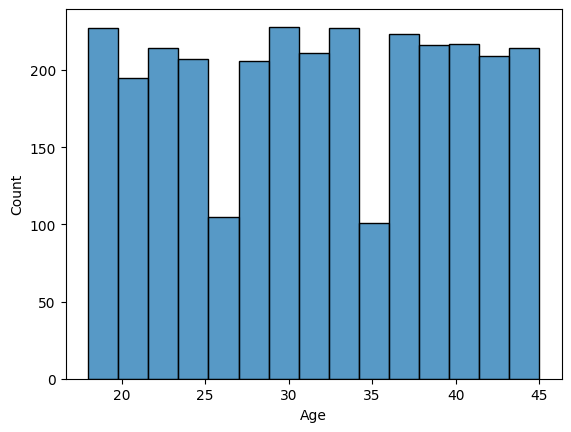

In [ ]:
# Cek distribusi 'Age'

sns.histplot(data = dfcut, x = 'Age')

In [ ]:
# Cek skewness 'Age'

print('Skewness Age:', dfcut['Age'].skew())

Skewness Age: -0.02108067113759791


Rentang usia gladiator adalah dari 20 hingga 45. Bahkan gladiator yang lebih muda dari 20, dan jumlahnya sebanyak entry usia-usia lainnya. Distribusi `Age` terhitung normal karena magnitude skewnessnya tidak lebih dari 0,5.

<Axes: xlabel='Height', ylabel='Count'>

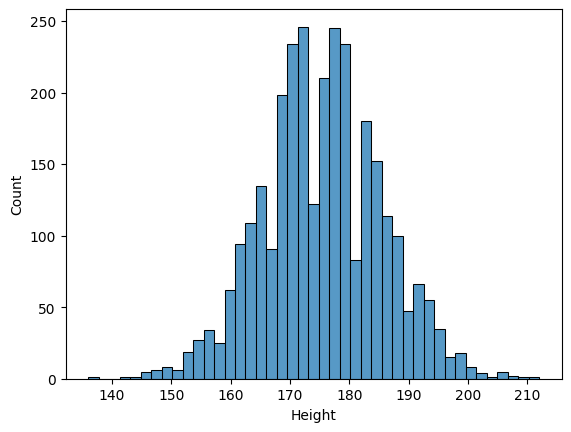

In [ ]:
# Cek distribusi 'Height'

sns.histplot(data=dfcut, x='Height')

In [ ]:
# Cek skewness 'Height'

print('Skewness Height:', dfcut['Height'].skew())

Skewness Height: 0.023923773350812173


Distribusi `Height` normal. Tinggi gladiator berkisar dari 140cm hingga sekitar 210cm.

<Axes: xlabel='Weight', ylabel='Count'>

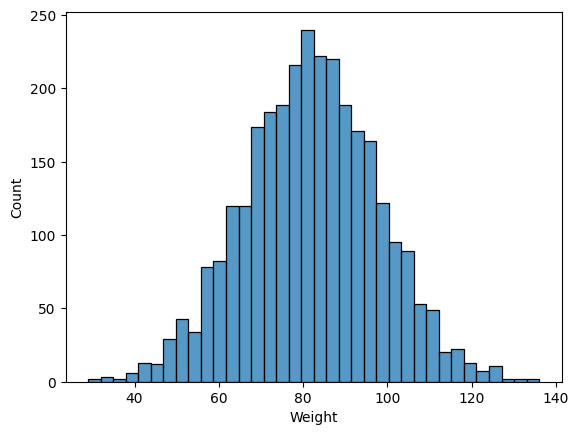

In [ ]:
# Cek distribusi 'Weight'

sns.histplot(data=dfcut, x='Weight')

In [ ]:
# Cek skewness 'Weight'

print('Skewness Weight:', dfcut['Weight'].skew())

Skewness Weight: 0.003053134658091038


Distribusi `Weight` normal. Berat badan gladiator berkisar dari hampir 20 kg hingga 140kg.

<Axes: xlabel='Wins', ylabel='Count'>

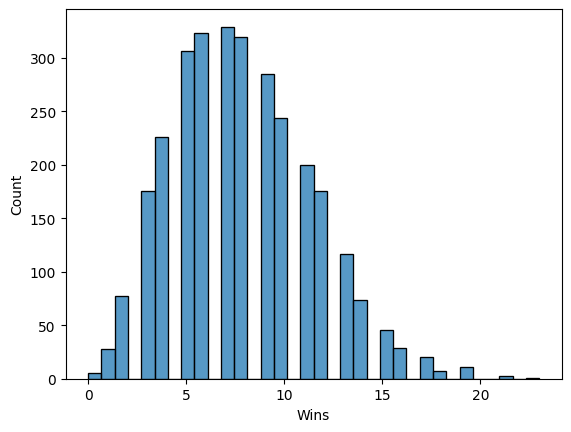

In [ ]:
# Cek distribusi 'Wins'

sns.histplot(data=dfcut, x='Wins')

In [ ]:
# Cek skewness 'Wins'

print('Skewness Wins:', dfcut['Wins'].skew())

Skewness Wins: 0.4712405257631691


Distribusi `Wins` masih bisa dibilang normal karena magnitude skewnessnya tidak lebih dari 0,5. Jumlah kemenangan tertinggi yang diraih oleh gladiator-gladiator pada dataset adalah 22.

<Axes: xlabel='Losses', ylabel='Count'>

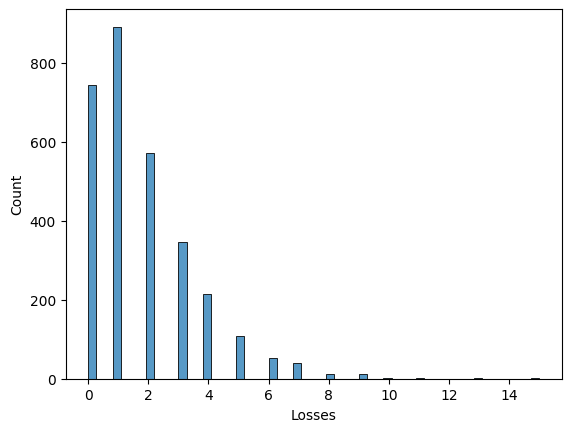

In [ ]:
# Cek distribusi 'Losses'

sns.histplot(data=dfcut, x='Losses')

In [ ]:
# Cek skewness 'Losses'

print('Skewness Losses:', dfcut['Losses'].skew())

Skewness Losses: 1.5358712139541126


Distribusi `Losses` highly skewed karena skewnessnya lebih besar dari 1. Ada gladiator yang telah kalah 15 kali.

<Axes: xlabel='Mental Resilience', ylabel='Count'>

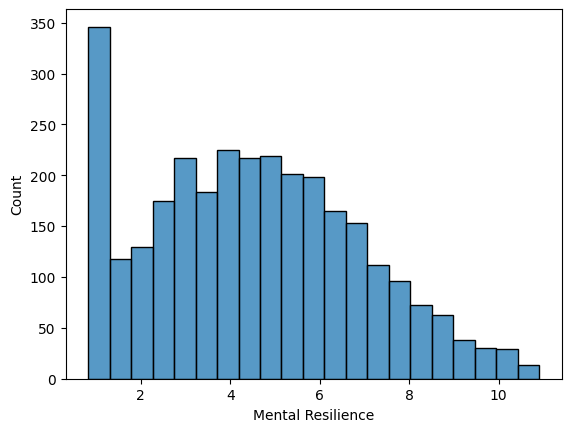

In [ ]:
# Cek distribusi 'Mental Resilience'

sns.histplot(data=dfcut, x='Mental Resilience')

In [ ]:
# Cek skewness 'Mental Resilience'

print('Skewness Mental Resilience:', dfcut['Mental Resilience'].skew())

Skewness Mental Resilience: 0.29779680295405986


Jumlah gladiator yang memiliki `Mental Resilience` rendah lebih banyak dibandingkan dengan yang lainnya. Distribusi `Mental Resilience` masih bisa dianggap normal.

<Axes: xlabel='Battle Experience', ylabel='Count'>

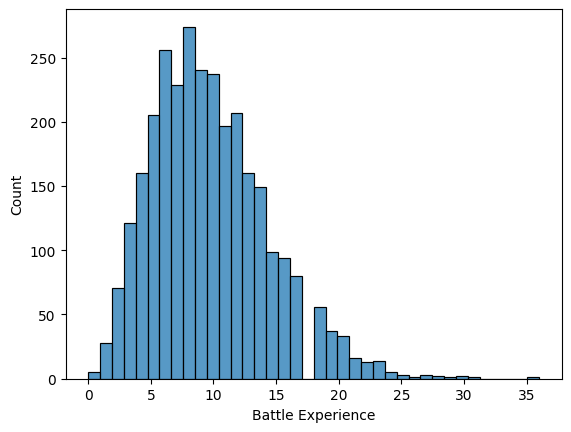

In [ ]:
# Cek distribusi 'Battle Experience'

sns.histplot(data=dfcut, x='Battle Experience')

In [ ]:
# Cek skewness 'Battle Experience'

print('Skewness Battle Experience:', dfcut['Battle Experience'].skew())

Skewness Battle Experience: 0.6803311016582776


Distribusi `Battle Experience` moderately skewed. Jumlah pengalaman bertarung tertinggi dari semua gladiator adalah 33.

<Axes: xlabel='Origin', ylabel='count'>

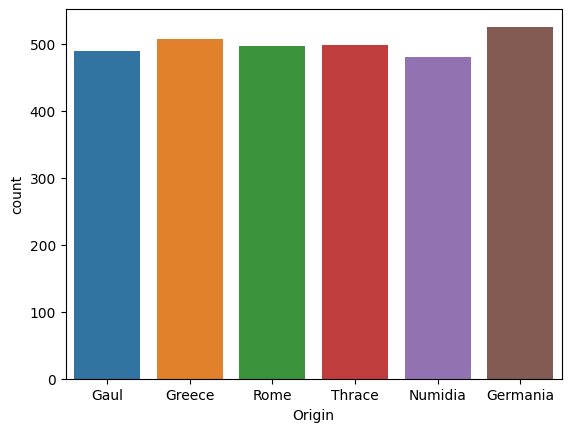

In [ ]:
# Cek jumlah per 'Origin'

sns.countplot(data=dfcut, x='Origin')

Gladiator-gladiator berasal dari *Gaul*, *Greece*, *Rome*, *Thrace*, *Numidia*, dan *Germania*. Paling banyak berasal dari *Germania*

<Axes: xlabel='Category', ylabel='count'>

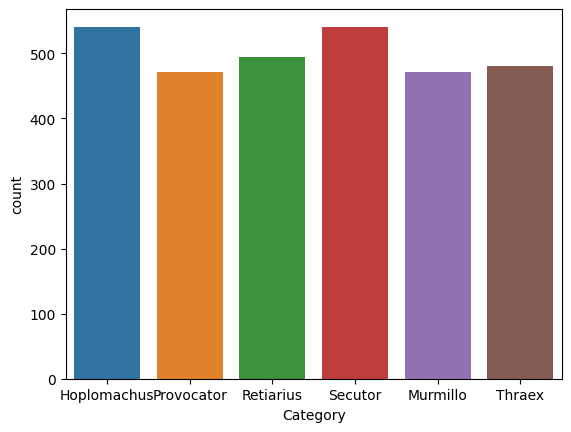

In [ ]:
# Cek jumlah per 'Category'

sns.countplot(data=dfcut, x='Category')

*Hoplomachus*, *Provocator*, *Retiarius*, *Secutor*, *Murmillo*, dan *Thraex* adalah jenis gladiatornya. Setiap kategori ini memiliki jenis peralatan dan gaya bertarung masing-masing yang unik. Dalam dataset ini, *Hoplomachus* dan *Secutor* jumlahnya sama banyak.

[Text(0, 0, 'Spear'),
 Text(1, 0, 'Dagger'),
 Text(2, 0, 'Net'),
 Text(3, 0, 'Gladius (Sword)'),
 Text(4, 0, 'Sica (Curved Sword)'),
 Text(5, 0, 'Trident')]

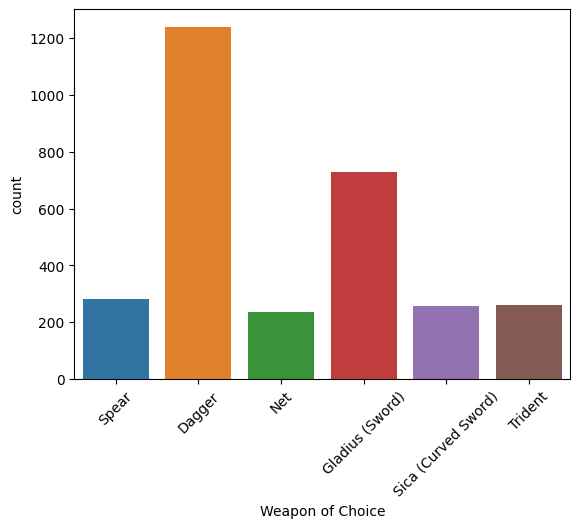

In [ ]:
# Cek jumlah per 'Weapon of Choice'

wepChoice = sns.countplot(data=dfcut, x='Weapon of Choice')
wepChoice.set_xticklabels(wepChoice.get_xticklabels(), rotation=45)

*Dagger* adalah senjata pilihan terbanyak dari jenis-jenis senjata yang lain, dengan pedang *Gladius* sebagai senjata pilihan terbanyak kedua. Senjata-senjata yang lain terpilih sama rata.

<Axes: xlabel='Equipment Quality', ylabel='count'>

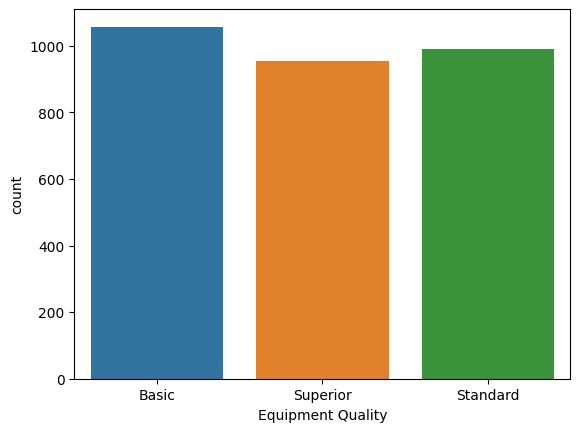

In [ ]:
# Cek jumlah per 'Equipment Quality'

sns.countplot(data=dfcut, x='Equipment Quality')

Gladiator paling banyak memiliki peralatan dasar.

<Axes: xlabel='Injury History', ylabel='count'>

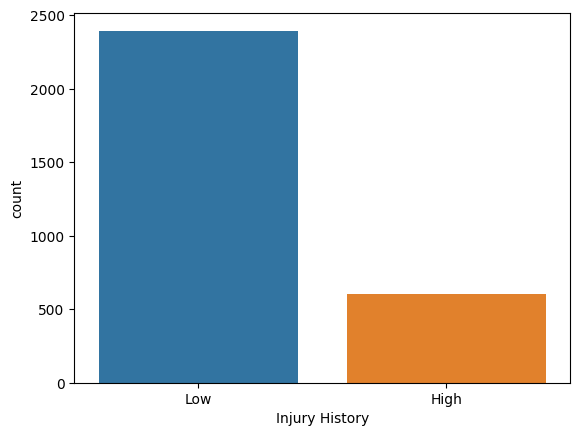

In [ ]:
# Cek jumlah per 'Injury History'

sns.countplot(data=dfcut, x='Injury History')

Jumlah gladiator yang memiliki catatan cedera yang rendah lebih banyak dibandingkan catatan cedera yang tinggi.

<Axes: xlabel='Tactical Knowledge', ylabel='count'>

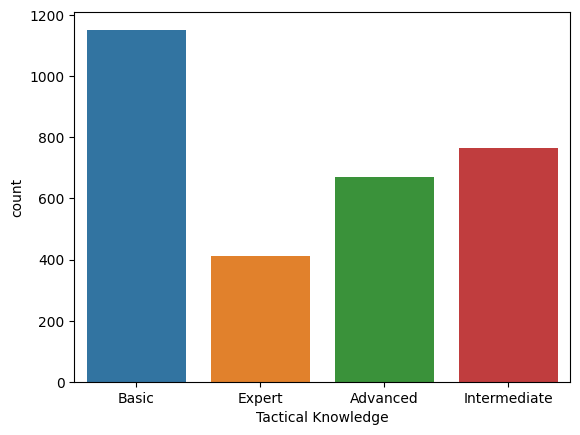

In [ ]:
# Cek jumlah per 'Tactical Knowledge'

sns.countplot(data=dfcut, x='Tactical Knowledge')

Sebagian besar gladiator hanya memiliki pengetahuan taktis dasar. Semakin tinggi tingkat pengetahuannya, semakin sedikit gladiator yang memilikinya.

<Axes: xlabel='Health Status', ylabel='count'>

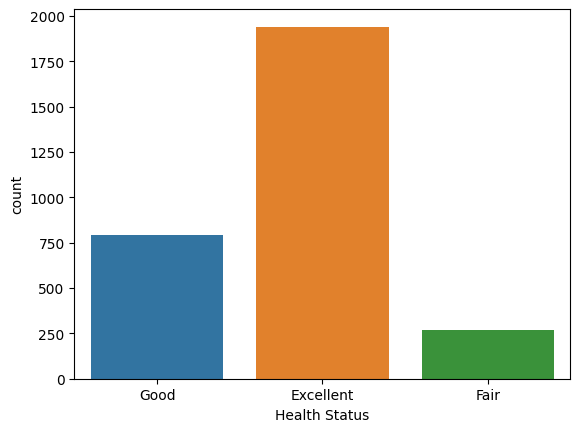

In [ ]:
# Cek jumlah per 'Health Status'

sns.countplot(data=dfcut, x='Health Status')

Gladiator-gladiator pada dataset sebagian besar memiliki kondisi kesehatan yang sangat baik.

<Axes: xlabel='Training Intensity', ylabel='count'>

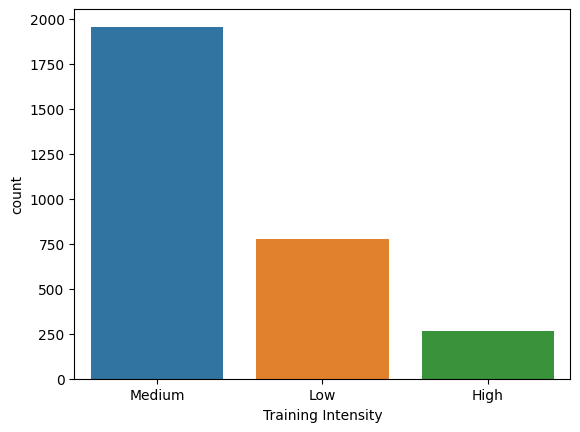

In [ ]:
# Cek jumlah per 'Training Intensity'

sns.countplot(data=dfcut, x='Training Intensity')

Sebagian besar gladiator memiliki intensitas latihan yang moderat. Gladiator dengan tingkat latihan rendah jumlahnya terbanyak kedua.

<Axes: xlabel='Battle Strategy', ylabel='count'>

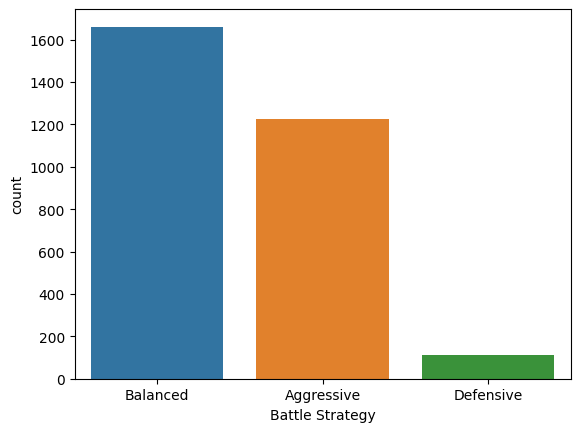

In [ ]:
# Cek jumlah per 'Battle Strategy'

sns.countplot(data=dfcut, x='Battle Strategy')

Gladiator-gladiator pada dataset cenderung memilih strategi yang seimbang antara aggresif dan defensif. Jumlah gladiator yang murni aggresif terbanyak kedua, dan jumlah gladiator yang murni defensif paling sedikit.

<Axes: xlabel='Survived', ylabel='count'>

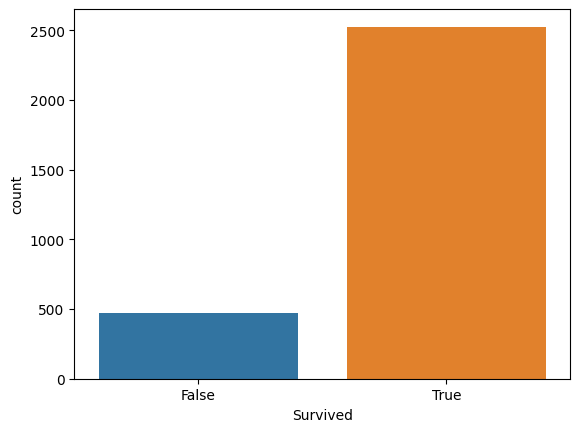

In [ ]:
# Cek jumlah per 'Survived'

sns.countplot(data=dfcut, x='Survived')

Jumlah gladiator yang bertahan hidup dari pertarungan lebih banyak daripada yang tidak.

# Feature Engineering

Data telah bersih dari missing value dan outlier sehingga mereka tidak akan dihandle di bagian ini. Scaling akan dilakukan ke semua fitur numerik. OrdinalEncoder akan diterapkan pada `Equipment Quality`, `Injury History`, `Tactical Knowledge`, `Health Status`, dan `Training Intensity`. Kolom-kolom kategorik `Origin`, `Category`, `Weapon of Choice`, `Battle Strategy`, dan `Survived` akan dipetakan menjadi angka secara manual. Pemisahan dataset menjadi data train dan test akan dilakukan dengan rasio 70:30.

In [8]:
# Backup dataframe

df1 = dfcut.copy()

In [9]:
# Ubah Origin menjadi angka
originMap = {
    'Gaul': 1,
    'Greece': 2,
    'Rome': 3,
    'Thrace': 4,
    'Numidia': 5,
    'Germania': 6
}

# Ubah Category menjadi angka
catMap = {
    'Hoplomachus': 1,
    'Provocator': 2,
    'Retiarius': 3,
    'Secutor': 4,
    'Murmillo': 5,
    'Thraex': 6
}

# Ubah Weapon of Choice menjadi angka
wepMap = {
    'Spear': 1,
    'Dagger': 2,
    'Net': 3,
    'Gladius (Sword)': 4,
    'Sica (Curved Sword)': 5,
    'Trident': 6
}

# Ubah Battle Strategy menjadi angka
stratMap = {
    'Balanced': 1,
    'Aggressive': 2,
    'Defensive': 3,
}

df1['Origin'] = df1['Origin'].map(originMap)
df1['Category'] = df1['Category'].map(catMap)
df1['Weapon of Choice'] = df1['Weapon of Choice'].map(wepMap)
df1['Battle Strategy'] = df1['Battle Strategy'].map(stratMap)

In [10]:
# Mengubah Survived menjadi 0 dan 1

survivedEnc = []

for i in df1['Survived']:
  if i == True:
    survivedEnc.append(1)
  elif i == False:
    survivedEnc.append(0)

# Membuat kolom baru dari survivedEnc
df1['Survived Enc'] = survivedEnc

In [11]:
# Membuang kolom 'Survived' yang lama
df1.drop(['Survived'], axis=1, inplace=True)

In [12]:
df1.head(10)

,Name,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy,Survived Enc
0,Cosconius Hostius,42,1,176,54,1,10,2,1,Basic,Low,2.309622,Basic,12,Good,Medium,1,1
1,Caecilius Valerius,30,2,173,67,2,6,0,2,Superior,Low,2.609512,Expert,6,Excellent,Medium,2,0
2,Sempronius Aulus,30,1,171,81,1,8,4,1,Basic,Low,8.770731,Advanced,12,Excellent,Medium,1,1
3,Lacerius Laberius,32,3,172,72,3,8,3,3,Superior,Low,1.047568,Intermediate,11,Excellent,Medium,2,1
4,Blaesus Modius,29,1,177,87,4,12,5,2,Standard,High,4.524769,Advanced,17,Good,Medium,1,1
5,Hortensius Gaius,23,1,158,77,5,7,1,4,Basic,Low,7.885911,Expert,8,Excellent,Medium,2,1
6,Lollius Nasennius,43,2,168,74,1,7,1,2,Basic,Low,3.026551,Advanced,8,Good,Low,2,1
7,Gaius Caninius,36,3,185,62,4,13,8,2,Superior,High,2.772185,Intermediate,21,Good,Low,1,1
8,Petreius Memmius,33,4,186,50,2,7,0,2,Basic,Low,8.687004,Advanced,7,Excellent,Medium,2,1
9,Numerius Sextus,32,2,171,56,2,8,1,4,Superior,Low,6.284513,Advanced,9,Excellent,Medium,3,1


In [13]:
# Backup menjadi dataset baru

df2 = df1.copy()
df2.head()

,Name,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy,Survived Enc
0,Cosconius Hostius,42,1,176,54,1,10,2,1,Basic,Low,2.309622,Basic,12,Good,Medium,1,1
1,Caecilius Valerius,30,2,173,67,2,6,0,2,Superior,Low,2.609512,Expert,6,Excellent,Medium,2,0
2,Sempronius Aulus,30,1,171,81,1,8,4,1,Basic,Low,8.770731,Advanced,12,Excellent,Medium,1,1
3,Lacerius Laberius,32,3,172,72,3,8,3,3,Superior,Low,1.047568,Intermediate,11,Excellent,Medium,2,1
4,Blaesus Modius,29,1,177,87,4,12,5,2,Standard,High,4.524769,Advanced,17,Good,Medium,1,1


Sebelum dataset displit menjadi data train dan test, dataset akan diencode terlebih dahulu. Kolom-kolom `Equipment Quality`, `Injury History`, `Tactical Knowledge`, `Health Status`, dan `Training Intensity` akan diencode dengan OrdinalEncoder.

In [14]:
# Define OrdinalEncoder

qualityEnc = OrdinalEncoder(categories=[['Basic', 'Standard', 'Superior']])
injuryEnc = OrdinalEncoder(categories=[['Low', 'High']])
tactEnc = OrdinalEncoder(categories=[['Basic', 'Intermediate', 'Expert', 'Advanced']])
healthEnc = OrdinalEncoder(categories=[['Fair', 'Good', 'Excellent']])
trainEnc = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])

In [15]:
# Eksekusi encoding

df1[['Equipment Quality']] = qualityEnc.fit_transform(dfcut[['Equipment Quality']])
df1[['Injury History']] = injuryEnc.fit_transform(dfcut[['Injury History']])
df1[['Tactical Knowledge']] = tactEnc.fit_transform(dfcut[['Tactical Knowledge']])
df1[['Health Status']] = healthEnc.fit_transform(dfcut[['Health Status']])
df1[['Training Intensity']] = trainEnc.fit_transform(dfcut[['Training Intensity']])

In [16]:
df1.head(10)

,Name,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy,Survived Enc
0,Cosconius Hostius,42,1,176,54,1,10,2,1,0.0,0.0,2.309622,0.0,12,1.0,1.0,1,1
1,Caecilius Valerius,30,2,173,67,2,6,0,2,2.0,0.0,2.609512,2.0,6,2.0,1.0,2,0
2,Sempronius Aulus,30,1,171,81,1,8,4,1,0.0,0.0,8.770731,3.0,12,2.0,1.0,1,1
3,Lacerius Laberius,32,3,172,72,3,8,3,3,2.0,0.0,1.047568,1.0,11,2.0,1.0,2,1
4,Blaesus Modius,29,1,177,87,4,12,5,2,1.0,1.0,4.524769,3.0,17,1.0,1.0,1,1
5,Hortensius Gaius,23,1,158,77,5,7,1,4,0.0,0.0,7.885911,2.0,8,2.0,1.0,2,1
6,Lollius Nasennius,43,2,168,74,1,7,1,2,0.0,0.0,3.026551,3.0,8,1.0,0.0,2,1
7,Gaius Caninius,36,3,185,62,4,13,8,2,2.0,1.0,2.772185,1.0,21,1.0,0.0,1,1
8,Petreius Memmius,33,4,186,50,2,7,0,2,0.0,0.0,8.687004,3.0,7,2.0,1.0,2,1
9,Numerius Sextus,32,2,171,56,2,8,1,4,2.0,0.0,6.284513,3.0,9,2.0,1.0,3,1


Sekarang data akan dipisah menjadi fitur dan label. Kolom nama tidak akan dilibatkan dalam fitur dan akan disendirikan.

In [17]:
# Pemisahan dataset menjadi fitur dan label

# Nama
names = df1[['Name']]

# Fitur
x = df1.drop(['Name', 'Survived Enc'], axis=1)

# Label
y = df1[['Survived Enc']]

x.head()

,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy
0,42,1,176,54,1,10,2,1,0.0,0.0,2.309622,0.0,12,1.0,1.0,1
1,30,2,173,67,2,6,0,2,2.0,0.0,2.609512,2.0,6,2.0,1.0,2
2,30,1,171,81,1,8,4,1,0.0,0.0,8.770731,3.0,12,2.0,1.0,1
3,32,3,172,72,3,8,3,3,2.0,0.0,1.047568,1.0,11,2.0,1.0,2
4,29,1,177,87,4,12,5,2,1.0,1.0,4.524769,3.0,17,1.0,1.0,1


In [18]:
# Split data menjadi train dan test

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.3, random_state=21)

Akan dilakukan pemisahan antara fitur numerik dan fitur kategorik untuk scaling pada fitur numerik.

In [19]:
xTrain.head()

,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy
456,41,5,164,68,5,11,2,2,0.0,0.0,2.752270,0.0,13,1.0,1.0,1
1345,33,4,146,96,5,5,1,2,0.0,0.0,2.640284,2.0,6,2.0,1.0,1
839,23,2,163,51,3,4,0,6,0.0,0.0,10.751115,2.0,4,2.0,2.0,3
746,26,3,174,75,3,5,0,6,2.0,0.0,3.014763,1.0,5,2.0,1.0,2
1227,24,3,178,95,6,11,3,5,0.0,0.0,4.846066,0.0,14,2.0,1.0,2


In [20]:
xTest.head()

,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy
465,41,2,193,70,2,9,1,4,2.0,0.0,4.078828,0.0,10,2.0,1.0,1
904,30,2,190,94,2,5,0,2,2.0,0.0,9.519584,0.0,5,2.0,1.0,2
2639,33,2,178,82,4,3,0,4,2.0,0.0,7.563419,1.0,3,2.0,1.0,2
2125,22,2,169,49,1,5,0,1,0.0,0.0,9.062920,2.0,5,2.0,2.0,1
1962,37,2,169,93,1,9,0,2,2.0,0.0,2.264693,0.0,9,2.0,1.0,1


In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 456 to 1231
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2100 non-null   int64  
 1   Origin              2100 non-null   int64  
 2   Height              2100 non-null   int64  
 3   Weight              2100 non-null   int64  
 4   Category            2100 non-null   int64  
 5   Wins                2100 non-null   int64  
 6   Losses              2100 non-null   int64  
 7   Weapon of Choice    2100 non-null   int64  
 8   Equipment Quality   2100 non-null   float64
 9   Injury History      2100 non-null   float64
 10  Mental Resilience   2100 non-null   float64
 11  Tactical Knowledge  2100 non-null   float64
 12  Battle Experience   2100 non-null   int64  
 13  Health Status       2100 non-null   float64
 14  Training Intensity  2100 non-null   float64
 15  Battle Strategy     2100 non-null   int64  
dtypes: f

In [21]:
# Pemisahan fitur numerik dan kategorik

catFeature = ['Origin', 'Category', 'Weapon of Choice', 'Equipment Quality', 'Injury History',
              'Tactical Knowledge', 'Health Status', 'Training Intensity',
              'Battle Strategy']

numFeature = ['Age', 'Height', 'Weight', 'Wins', 'Losses', 'Battle Experience', 'Mental Resilience']

xTrainCat = xTrain.drop(numFeature, axis=1)
xTestCat = xTest.drop(numFeature, axis=1)
xTrainNum = xTrain.drop(catFeature, axis=1)
xTestNum = xTest.drop(catFeature, axis=1)

# Penyimpanan index-index data train dan test untuk dikembalikan setelah scaling

origTrainIndex = xTrain.index.tolist()
origTestIndex = xTest.index.tolist()


In [22]:
xTrainNum.head()

,Age,Height,Weight,Wins,Losses,Mental Resilience,Battle Experience
456,41,164,68,11,2,2.752270,13
1345,33,146,96,5,1,2.640284,6
839,23,163,51,4,0,10.751115,4
746,26,174,75,5,0,3.014763,5
1227,24,178,95,11,3,4.846066,14


Untuk scaling, `Age`, `Height`, `Weight`, `Wins`, dan `Mental Resilience` akan discale dengan StandardScaler. `Losses` akan discale dengan RobustScaler sedangkan `Battle Experience` akan discale dengan MinMaxScaler.

In [23]:
# Define scaler

standScale = StandardScaler()
minMaxScale = MinMaxScaler()
robustScale = RobustScaler()

In [24]:
# Split feature numerik untuk scaling

xTrainStnd = xTrainNum.drop(['Losses', 'Battle Experience'], axis=1)
xTrainMiMa = xTrainNum[['Battle Experience']]
xTrainRob = xTrainNum[['Losses']]

xTestStnd = xTestNum.drop(['Losses', 'Battle Experience'], axis=1)
xTestMiMa = xTestNum[['Battle Experience']]
xTestRob = xTestNum[['Losses']]

In [25]:
# Scaling feature

standScale.fit(xTrainStnd)
minMaxScale.fit(xTrainMiMa)
robustScale.fit(xTrainRob)

# Scaling dengan standard scaler
xTrainStndScled = standScale.transform(xTrainStnd)
xTestStndScled = standScale.transform(xTestStnd)

# Scaling dengan min max scaler
xTrainMiMaScled = minMaxScale.transform(xTrainMiMa)
xTestMiMaScled = minMaxScale.transform(xTestMiMa)

# Scaling dengan robust scaler
xTrainRobScled = robustScale.transform(xTrainRob)
xTestRobScled = robustScale.transform(xTestRob)


In [26]:
# Pembuatan dataframe baru untuk feature yang telah discale

xTrainStndScledDF = pd.DataFrame(xTrainStndScled, columns = ['Age', 'Height', 'Weight', 'Wins', 'Mental Resilience'], index = origTrainIndex)
xTrainMiMaScledDF = pd.DataFrame(xTrainMiMaScled, columns = ['Battle Experience'], index = origTrainIndex)
xTrainRobScledDF = pd.DataFrame(xTrainRobScled, columns = ['Losses'], index = origTrainIndex)

xTestStndScledDF = pd.DataFrame(xTestStndScled, columns = ['Age', 'Height', 'Weight', 'Wins', 'Mental Resilience'], index = origTestIndex)
xTestMiMaScledDF = pd.DataFrame(xTestMiMaScled, columns = ['Battle Experience'], index = origTestIndex)
xTestRobScledDF = pd.DataFrame(xTestRobScled, columns = ['Losses'], index = origTestIndex)

In [27]:
# Penggabungan dataframe train dan test numerik menjadi satu

xTrainNumScled = pd.concat([xTrainStndScledDF, xTrainMiMaScledDF, xTrainRobScledDF], axis=1)
xTestNumScled = pd.concat([xTestStndScledDF, xTestMiMaScledDF, xTestRobScledDF], axis=1)

xTestNumScled

,Age,Height,Weight,Wins,Mental Resilience,Battle Experience,Losses
465,1.170787,1.757728,-0.745276,0.301851,-0.186916,0.322581,0.0
904,-0.192652,1.459342,0.762387,-0.835166,2.127291,0.161290,-0.5
2639,0.179195,0.265800,0.008555,-1.403674,1.295243,0.096774,-0.5
2125,-1.184245,-0.629357,-2.064481,-0.835166,1.933051,0.161290,-0.5
1962,0.674991,-0.629357,0.699568,0.301851,-0.958551,0.290323,-0.5
...,...,...,...,...,...,...,...
2985,-1.432143,0.265800,-0.808095,0.301851,-0.085542,0.387097,1.0
1121,0.674991,-1.425052,-0.556818,1.438868,-1.502973,0.548387,1.5
1193,0.179195,-1.126666,1.830315,-0.835166,-0.278349,0.258065,1.0
2948,1.542634,-0.132047,0.888025,1.154614,0.414705,0.483871,1.0


In [28]:
# Penggabungan fitur numerik dan kategorik

xTrainFinal = pd.concat([xTrainNumScled, xTrainCat], axis=1)
xTestFinal = pd.concat([xTestNumScled, xTestCat], axis=1)

xTrainFinal.head()

,Age,Height,Weight,Wins,Mental Resilience,Battle Experience,Losses,Origin,Category,Weapon of Choice,Equipment Quality,Injury History,Tactical Knowledge,Health Status,Training Intensity,Battle Strategy
456,1.170787,-1.126666,-0.870915,0.870359,-0.751162,0.419355,0.5,5,5,2,0.0,0.0,0.0,1.0,1.0,1
1345,0.179195,-2.916979,0.888025,-0.835166,-0.798795,0.193548,0.0,4,5,2,0.0,0.0,2.0,2.0,1.0,1
839,-1.060295,-1.226128,-1.938843,-1.119420,2.651118,0.129032,-0.5,2,3,6,0.0,0.0,2.0,2.0,2.0,3
746,-0.688448,-0.132047,-0.431180,-0.835166,-0.639512,0.161290,-0.5,3,3,6,2.0,0.0,1.0,2.0,1.0,2
1227,-0.936346,0.265800,0.825206,0.870359,0.139426,0.451613,1.0,3,6,5,0.0,0.0,0.0,2.0,1.0,2


Sekarang data telah siap untuk dicerna oleh model.

# Model Definition

Model yang didefinisikan di sini adalah KNN, SVM, Decision Tree, dan Random Forest. Akan dibuat pipeline untuk masing masing model yang telah melibatkan langkah-langkah feature-engineering di atas.

## Define Model KNN, SVM, Random Forest, dan Decision Tree

In [29]:
# Define KNN

knn = KNeighborsClassifier(n_neighbors=50)
knn

KNeighborsClassifier(n_neighbors=50)

In [30]:
# Define SVM

svm = SVC()
svm

SVC()

In [31]:
# Define Random Forest

randFor = RandomForestClassifier()
randFor

RandomForestClassifier()

In [32]:
# Define Decision Tree

decTree = DecisionTreeClassifier()
decTree

DecisionTreeClassifier()

## Define Pipeline untuk Scaling dan Model

In [33]:
# Definisikan pipeline setiap model

# Pipeline untuk scaling
preProcessPipe = ColumnTransformer([
    ('scaleStandard', StandardScaler(), ['Age', 'Height', 'Weight', 'Wins', 'Mental Resilience']),
    ('scaleMiMa', MinMaxScaler(), ['Battle Experience']),
    ('scaleRob', RobustScaler(), ['Losses'])
])

# Pipeline scaling dan training model SVM
pipeSVC = Pipeline([
    ('scaler', preProcessPipe),
    ('svm', svm)
])

# Pipeline scaling dan training model KNN
pipeKNN = Pipeline([
    ('scaler', preProcessPipe),
    ('knn', knn)
])

# Pipeline scaling dan training model Random Forest
pipeRF = Pipeline([
    ('scaler', preProcessPipe),
    ('randFor', randFor)
])

# Pipeline scaling dan training model Decision Tree
pipeDT = Pipeline([
    ('scaler', preProcessPipe),
    ('decTree', decTree)
])

# Model Training

Pada bagian ini, model-model akan ditrain ke dataset yang telah disetup. Model yang terlibat dalam pipeline akan ditrain ke fitur-fitur yang belum discale karena di dalam pipelinenya telah melibatkan feature-scaling.

## Training SVM

In [47]:
# Training SVM

svm.fit(xTrainFinal, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [35]:
# Training SVM dengan pipeline

pipeSVC.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scaleStandard',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Wins',
                                                   'Mental Resilience']),
                                                 ('scaleMiMa', MinMaxScaler(),
                                                  ['Battle Experience']),
                                                 ('scaleRob', RobustScaler(),
                                                  ['Losses'])])),
                ('svm', SVC())])

## Training KNN

In [36]:
# Training KNN dengan pipeline

pipeKNN.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scaleStandard',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Wins',
                                                   'Mental Resilience']),
                                                 ('scaleMiMa', MinMaxScaler(),
                                                  ['Battle Experience']),
                                                 ('scaleRob', RobustScaler(),
                                                  ['Losses'])])),
                ('knn', KNeighborsClassifier(n_neighbors=50))])

## Training Random Forest

In [37]:
# Training Random Forest dengan pipeline

pipeRF.fit(xTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scaleStandard',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Wins',
                                                   'Mental Resilience']),
                                                 ('scaleMiMa', MinMaxScaler(),
                                                  ['Battle Experience']),
                                                 ('scaleRob', RobustScaler(),
                                                  ['Losses'])])),
                ('randFor', RandomForestClassifier())])

## Training Decision Tree

In [38]:
# Training Decision Tree dengan pipeline

pipeDT.fit(xTrain, yTrain)

Pipeline(steps=[('scaler',
                 ColumnTransformer(transformers=[('scaleStandard',
                                                  StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'Wins',
                                                   'Mental Resilience']),
                                                 ('scaleMiMa', MinMaxScaler(),
                                                  ['Battle Experience']),
                                                 ('scaleRob', RobustScaler(),
                                                  ['Losses'])])),
                ('decTree', DecisionTreeClassifier())])

# Model Evaluation

## Evaluasi SVM

In [44]:
xTrainFinal.head()

,Age,Height,Weight,Wins,Mental Resilience,Battle Experience,Losses,Origin,Category,Weapon of Choice,Equipment Quality,Injury History,Tactical Knowledge,Health Status,Training Intensity,Battle Strategy
456,1.170787,-1.126666,-0.870915,0.870359,-0.751162,0.419355,0.5,5,5,2,0.0,0.0,0.0,1.0,1.0,1
1345,0.179195,-2.916979,0.888025,-0.835166,-0.798795,0.193548,0.0,4,5,2,0.0,0.0,2.0,2.0,1.0,1
839,-1.060295,-1.226128,-1.938843,-1.119420,2.651118,0.129032,-0.5,2,3,6,0.0,0.0,2.0,2.0,2.0,3
746,-0.688448,-0.132047,-0.431180,-0.835166,-0.639512,0.161290,-0.5,3,3,6,2.0,0.0,1.0,2.0,1.0,2
1227,-0.936346,0.265800,0.825206,0.870359,0.139426,0.451613,1.0,3,6,5,0.0,0.0,0.0,2.0,1.0,2


In [48]:
# Evaluasi prediksi model SVM

## DEV NOTE: Bagian ini aku tidak tahu errornya kenapa. Soalnya ketika pendefinisian
##           svm dirun lagi (blok kode Training SVM), kode ini akan jalan lagi.

yPredTrainSVM = svm.predict(xTrainFinal)
yPredTestSVM = svm.predict(xTestFinal)

print('Train SVM Report : \n', classification_report(yTrain, yPredTrainSVM), '\n')
print('Test SVM Report : \n', classification_report(yTest, yPredTestSVM), '\n')

Train SVM Report : 
               precision    recall  f1-score   support

           0       0.94      0.42      0.58       330
           1       0.90      0.99      0.95      1770

    accuracy                           0.90      2100
   macro avg       0.92      0.71      0.76      2100
weighted avg       0.91      0.90      0.89      2100
 

Test SVM Report : 
               precision    recall  f1-score   support

           0       0.87      0.37      0.51       145
           1       0.89      0.99      0.94       755

    accuracy                           0.89       900
   macro avg       0.88      0.68      0.73       900
weighted avg       0.89      0.89      0.87       900
 



In [41]:
# Evaluasi prediksi model SVM lewat pipeline

yPredTrainSVMPipe = pipeSVC.predict(xTrain)
yPredTestSVMPipe = pipeSVC.predict(xTest)

print('Train SVM (Pipe) Report : \n', classification_report(yTrain, yPredTrainSVMPipe), '\n')
print('Test SVM (Pipe) Report : \n', classification_report(yTest, yPredTestSVMPipe), '\n')

Train SVM (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.86      0.45      0.59       330
           1       0.91      0.99      0.94      1770

    accuracy                           0.90      2100
   macro avg       0.88      0.72      0.77      2100
weighted avg       0.90      0.90      0.89      2100
 

Test SVM (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.80      0.36      0.50       145
           1       0.89      0.98      0.93       755

    accuracy                           0.88       900
   macro avg       0.84      0.67      0.71       900
weighted avg       0.87      0.88      0.86       900
 



Akurasi klasifkasi kurang lebih sama dengan dan tanpa pipeline. Klasifikasi dengan model-model yang lainnya akan menggunakan pipeline model masing masing. Sebelum beralih ke pipeline model yang lain, model SVM akan ditune parameternya dengan RandomSearchCV. Cek performa model dengan Cross-Validation.

In [42]:
# Cross Validation pipeline SVM

f1TrainCrossVal = cross_val_score(pipeSVC,
                                  xTrain,
                                  yTrain,
                                  cv=3,
                                  scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1TrainCrossVal)
print('F1 Score - Mean - Cross Validation : ', f1TrainCrossVal.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCrossVal.std())
print(f'F1 Score - Range of Test-Set       :  {f1TrainCrossVal.mean()-f1TrainCrossVal.std()} - {f1TrainCrossVal.mean()+f1TrainCrossVal.std()}')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score - All - Cross Validation  :  [0.93956487 0.93936944 0.94462541]
F1 Score - Mean - Cross Validation :  0.9411865721359
F1 Score - Std - Cross Validation  :  0.0024329320433335425
F1 Score - Range of Test-Set       :  0.9387536400925665 - 0.9436195041792335


Hasil CV menunjukkan bahwa F1 Score model pipeline SVM ketika memprediksi data test pada notebook ini berkisar dari 93,8% hingga 94,3%. Hasil ini konsisten dengan nilai F1 Score yang ditunjukkan oleh Classification Report di blok kode sebelumnya, yakni 93%. Model ini terhindar dari overfit.

In [43]:
# Tuning parameter pipeline SVM

# Parameter-parameter SVM untuk RandomSearchCV
paramsSVM = {'svm__C': list(range(10, 110, 10)),
            'svm__kernel': ['rbf', 'poly', 'sigmoid'],
            'svm__degree': [3, 4, 5],
            'svm__gamma': ['auto', 'scale']}

# Training pipeline SVM dengan RandomSearchCV
clfSVC = RandomizedSearchCV(estimator=pipeSVC,
                            param_distributions=paramsSVM,
                            n_iter=20,
                            cv=3,
                            random_state=46,
                            n_jobs=-1,
                            scoring='f1')

clfSVC.fit(xTrain, yTrain)

# Best estimator pipeline SVM

clfSVCBest = clfSVC.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
# Cek performa pipeline SVM yang telah ditune

yPredTrainSVMPipeTuned = clfSVCBest.predict(xTrain)
yPredTestSVMPipeTuned = clfSVCBest.predict(xTest)

print('Train SVM (Pipe-Tuned) Report : \n', classification_report(yTrain, yPredTrainSVMPipeTuned), '\n')
print('Test SVM (Pipe-Tuned) Report : \n', classification_report(yTest, yPredTestSVMPipeTuned), '\n')

Train SVM (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.87      0.54      0.66       330
           1       0.92      0.99      0.95      1770

    accuracy                           0.91      2100
   macro avg       0.90      0.76      0.81      2100
weighted avg       0.91      0.91      0.91      2100
 

Test SVM (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.76      0.47      0.58       145
           1       0.90      0.97      0.94       755

    accuracy                           0.89       900
   macro avg       0.83      0.72      0.76       900
weighted avg       0.88      0.89      0.88       900
 



Akurasi model SVM yang telah ditune meningkat 1% prediksinya pada data train dan test.

## Evaluasi KNN

In [50]:
# Evaluasi prediksi model KNN lewat pipeline

yPredTrainKNNPipe = pipeKNN.predict(xTrain)
yPredTestKNNPipe = pipeKNN.predict(xTest)

print('Train KNN (Pipe) Report : \n', classification_report(yTrain, yPredTrainKNNPipe), '\n')
print('Test KNN (Pipe) Report : \n', classification_report(yTest, yPredTestKNNPipe), '\n')

Train KNN (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.91      0.30      0.45       330
           1       0.88      0.99      0.94      1770

    accuracy                           0.88      2100
   macro avg       0.90      0.65      0.69      2100
weighted avg       0.89      0.88      0.86      2100
 

Test KNN (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.75      0.21      0.32       145
           1       0.87      0.99      0.92       755

    accuracy                           0.86       900
   macro avg       0.81      0.60      0.62       900
weighted avg       0.85      0.86      0.83       900
 



Performa pipeline KNN cukup baik dengan selisih akurasi 2% pada data train dan test.

In [51]:
# Tuning parameter pipeline KNN

# Parameter-parameter KNN untuk RandomSearchCV
paramsKNN = {'knn__n_neighbors': list(range(50, 80, 10)),
            'knn__weights': ['uniform', 'distance']}

# Training pipeline KNN dengan RandomSearchCV
clfKNN = RandomizedSearchCV(estimator=pipeKNN,
                            param_distributions=paramsKNN,
                            n_iter=20,
                            cv=3,
                            random_state=46,
                            n_jobs=-1,
                            scoring='f1')

clfKNN.fit(xTrain, yTrain)

# Best estimator pipeline KNN

clfKNNBest = clfKNN.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [52]:
# Cek performa pipeline KNN yang telah ditune

yPredTrainKNNPipeTuned = clfKNNBest.predict(xTrain)
yPredTestKNNPipeTuned = clfKNNBest.predict(xTest)

print('Train KNN (Pipe-Tuned) Report : \n', classification_report(yTrain, yPredTrainKNNPipeTuned), '\n')
print('Test KNN (Pipe-Tuned) Report : \n', classification_report(yTest, yPredTestKNNPipeTuned), '\n')

Train KNN (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00      1770

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100
 

Test KNN (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.76      0.23      0.36       145
           1       0.87      0.99      0.92       755

    accuracy                           0.86       900
   macro avg       0.81      0.61      0.64       900
weighted avg       0.85      0.86      0.83       900
 



Prediksi model KNN yang telah ditune lebih overfit dibandingkan sebelum tuning. Akurasi pada data train naik menjadi 100% sementara akurasi pada data test tetap 86%.

## Evaluasi Random Forest

In [53]:
# Evaluasi prediksi model Random Forest lewat pipeline

yPredTrainRFPipe = pipeRF.predict(xTrain)
yPredTestRFPipe = pipeRF.predict(xTest)

print('Train Random Forest (Pipe) Report : \n', classification_report(yTrain, yPredTrainRFPipe), '\n')
print('Test Random Forest (Pipe) Report : \n', classification_report(yTest, yPredTestRFPipe), '\n')

Train Random Forest (Pipe) Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00      1770

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100
 

Test Random Forest (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.75      0.50      0.60       145
           1       0.91      0.97      0.94       755

    accuracy                           0.89       900
   macro avg       0.83      0.73      0.77       900
weighted avg       0.88      0.89      0.88       900
 



Model pipeline Random Forest di sini overfit. Akurasi prediksi pada data train adalah 100% sementara pada data test akurasi prediksinya 89%.

In [54]:
# Tuning parameter pipeline Random Forest

# Parameter-parameter RF untuk RandomSearchCV
paramsRF = {'randFor__n_estimators': [200, 300, 400, 500],
            'randFor__max_depth': [100, 200, 300, 400],
            'randFor__min_samples_split': [2, 5, 10, 14],
            'randFor__min_samples_leaf': [1, 2, 4, 6, 8]}

# Training pipeline RF dengan RandomSearchCV
clfRF = RandomizedSearchCV(estimator=pipeRF,
                            param_distributions=paramsRF,
                            n_iter=20,
                            cv=3,
                            random_state=46,
                            n_jobs=-1,
                            scoring='f1')

clfRF.fit(xTrain, yTrain)

# Best estimator pipeline RF

clfRFBest = clfRF.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [55]:
# Cek performa pipeline RF setelah ditune

yPredTrainRFPipeTuned = clfRFBest.predict(xTrain)
yPredTestRFPipeTuned = clfRFBest.predict(xTest)

print('Train Random Forest (Pipe-Tuned) Report : \n', classification_report(yTrain, yPredTrainRFPipeTuned), '\n')
print('Test Random Forest (Pipe-Tuned) Report : \n', classification_report(yTest, yPredTestRFPipeTuned), '\n')

Train Random Forest (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81       330
           1       0.95      0.99      0.97      1770

    accuracy                           0.95      2100
   macro avg       0.95      0.85      0.89      2100
weighted avg       0.95      0.95      0.95      2100
 

Test Random Forest (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.75      0.47      0.58       145
           1       0.90      0.97      0.94       755

    accuracy                           0.89       900
   macro avg       0.83      0.72      0.76       900
weighted avg       0.88      0.89      0.88       900
 



Performa pipeline Random Forest masih overfit, tapi sedikit lebih baik. Akurasi data train sebelum tune adalah 100%. Setelah tune akurasinya menjadi 94% - 95%. Terjadi penurunan tapi semakin dekat dengan akurasi data tes.

## Evaluasi Decision Tree

In [56]:
# Evaluasi prediksi model Decision Tree lewat pipeline

yPredTrainDTPipe = pipeDT.predict(xTrain)
yPredTestDTPipe = pipeDT.predict(xTest)

print('Train Dec. Tree (Pipe) Report : \n', classification_report(yTrain, yPredTrainDTPipe), '\n')
print('Test Dec. Tree (Pipe) Report : \n', classification_report(yTest, yPredTestDTPipe), '\n')

Train Dec. Tree (Pipe) Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00      1770

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100
 

Test Dec. Tree (Pipe) Report : 
               precision    recall  f1-score   support

           0       0.58      0.59      0.59       145
           1       0.92      0.92      0.92       755

    accuracy                           0.86       900
   macro avg       0.75      0.75      0.75       900
weighted avg       0.87      0.86      0.87       900
 



Performa model Decision Tree pada notebook ini juga overfit dengan akurasi pada data train 100% dan 86% pada data test.

In [57]:
# Tuning parameter pipeline Dec. Tree

# Parameter-parameter DT untuk RandomSearchCV
paramsDT = {'decTree__splitter': ['best', 'random'],
            'decTree__max_depth': [100, 200, 300, 400],
            'decTree__min_samples_split': [2, 5, 10, 14],
            'decTree__min_samples_leaf': [1, 2, 4, 6, 8]}

# Training pipeline DT dengan RandomSearchCV
clfDT = RandomizedSearchCV(estimator=pipeDT,
                            param_distributions=paramsDT,
                            n_iter=20,
                            cv=3,
                            random_state=46,
                            n_jobs=-1,
                            scoring='f1')

clfDT.fit(xTrain, yTrain)

# Best estimator pipeline DT

clfDTBest = clfDT.best_estimator_

In [58]:
# Cek pipeline Dec. Tree setelah ditune

yPredTrainDTPipeTuned = clfDTBest.predict(xTrain)
yPredTestDTPipeTuned = clfDTBest.predict(xTest)

print('Train Dec. Tree (Pipe-Tuned) Report : \n', classification_report(yTrain, yPredTrainDTPipeTuned), '\n')
print('Test Dec. Tree (Pipe-Tuned) Report : \n', classification_report(yTest, yPredTestDTPipeTuned), '\n')

Train Dec. Tree (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.73      0.57      0.64       330
           1       0.92      0.96      0.94      1770

    accuracy                           0.90      2100
   macro avg       0.83      0.77      0.79      2100
weighted avg       0.89      0.90      0.89      2100
 

Test Dec. Tree (Pipe-Tuned) Report : 
               precision    recall  f1-score   support

           0       0.61      0.48      0.53       145
           1       0.90      0.94      0.92       755

    accuracy                           0.87       900
   macro avg       0.75      0.71      0.73       900
weighted avg       0.86      0.87      0.86       900
 



Performa model Decision Tree setelah ditune menjadi lebih baik dengan akurasinya pada data train 90%, sementara akurasinya pada data test adalah 88%. Selisih akurasinya antara data train dan test adalah 2%. Selisih akurasi ini sama dengan pipeline SVM yang telah ditune pada notebook ini. Namun pipeline SVM akurasinya lebih tinggi 1% sehingga model itu yang akan disave dan digunakan untuk memprediksi data baru.

# Model Saving

Saving pipeline SVM yang telah ditune untuk penggunaan kedepannya.

In [59]:
# Simpan pipeline SVM yang telah ditune

with open ('pipeTunedSVM.pkl', 'wb') as file1:
  pickle.dump(clfSVCBest, file1)

In [60]:
# Load pipeline SVM yang telah disave

with open ('pipeTunedSVM.pkl', 'rb') as file1:
  clfSVM = pickle.load(file1)

# Model Inference

Akan dibuat data petarung baru yang akan diprediksi oleh pipeline model apakah petarung akan bertahan hidup atau tidak.

In [61]:
dfcut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 737569
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                3000 non-null   object 
 1   Age                 3000 non-null   int64  
 2   Origin              3000 non-null   object 
 3   Height              3000 non-null   int64  
 4   Weight              3000 non-null   int64  
 5   Category            3000 non-null   object 
 6   Wins                3000 non-null   int64  
 7   Losses              3000 non-null   int64  
 8   Weapon of Choice    3000 non-null   object 
 9   Equipment Quality   3000 non-null   object 
 10  Injury History      3000 non-null   object 
 11  Mental Resilience   3000 non-null   float64
 12  Tactical Knowledge  3000 non-null   object 
 13  Battle Experience   3000 non-null   int64  
 14  Health Status       3000 non-null   object 
 15  Training Intensity  3000 non-null   object 
 16  Batt

In [65]:
# Pembuatan data baru

newData = {
    'Name': 'Biggus Dickus',
    'Age': 32,
    'Origin': 3,
    'Height': 170,
    'Weight': 69,
    'Category': 4,
    'Wins': 6,
    'Losses': 4,
    'Weapon of Choice': 4,
    'Equipment Quality': 1.0,
    'Injury History': 0.0,
    'Mental Resilience': 5.781233,
    'Tactical Knowledge': 1.0,
    'Battle Experience': 10,
    'Health Status': 1.0,
    'Training Intensity': 2.0,
    'Battle Strategy': 1
}

newDataDF = pd.DataFrame(newData, index=[0])
newDataDF

,Name,Age,Origin,Height,Weight,Category,Wins,Losses,Weapon of Choice,Equipment Quality,Injury History,Mental Resilience,Tactical Knowledge,Battle Experience,Health Status,Training Intensity,Battle Strategy
0,Biggus Dickus,32,3,170,69,4,6,4,4,1.0,0.0,5.781233,1.0,10,1.0,2.0,1


In [69]:
# Pisahkan nama dari newDataDF

newDataNoName = newDataDF.drop(['Name'], axis=1)

# Prediksi survivability gladiator dengan pipeline yang telah disave
predSurv = clfSVM.predict(newDataNoName)

if predSurv == 0:
  print(f"Gladiator {newData['Name']} tewas bertarung. Semper Desiderari.")
elif predSurv == 1:
  print(f"Gladiator {newData['Name']} berhasil bertahan hidup. Vincere est Totum.")

Gladiator Biggus Dickus berhasil bertahan hidup. Vincere est Totum.


# Conceptual Problems

Bagging dapat mencegah terjadinya overfitting dan mengurangi variansi model. Dalam bagging, sejumlah model ditrain secara independen pada subset-subset data train yang berbeda. Training ini seringkali dicapai melalui bootstrapping. Prediksi dari setiap model kemudian digabungkan dengan merata-rata untuk regresi, atau voting mayoritas untuk klasifikasi. \

Dalam Random Forest, setiap decision tree dibangun secara individu dengan sebuah subset fitur dan data train yang terpilih secara acak. Dalam Boosting, setiap tree yang baru dilatih untuk memperbaiki kesalahan tree yang sebelumnya. \

Cross-Validation adalah sebuah teknik untuk mengevaluasi model machine learning dengan training beberapa model pada subset-subset dari data input dan mengevaluasinya berdasarkan subset komplementer data. Cross-Validation membantu memperkirakan akurasi sebuah model. Alat ini dapat digunakan untuk mencegah overfitting.

# Simpulan

Manusia suka bertaruh, bahkan sejak zaman kekaisaran Romawi. Masayrakat Romawi sering bertaruh pada pertarungan gladiator layaknya masyarakat lokal bertaruh tim sepak bola. Kepercayaan mereka pada petarung didasari oleh aspek-aspek seperti background, track-record, intensitas latihan, dan jumlah menang-kalah. Pada notebook ini telah disetup sebuah model untuk memprediksi apakah seorang gladiator akan bertahan hidup atau tidak. Dataset yang menjadi bahan training model berisi profil-profil gladiator. Aspek profil yang tidak digunakan dalam training adalah: `Birth Year`, `Special Skills`, `Patron Wealth`, `Public Favor`, `Diet and Nutrition`, `Allegiance Network`, `Psychological Profile`, `Personal Motivation`, `Previous Occupation`, `Social Standing`, dan `Crowd Appeal Techniques`. Mula-mula terdapat 700000+ entry data, namun jumlah yang digunakan adalah 3000 entry agar waktu training tidak terlalu lama. \

Kolom `Survived` menjadi label sementara yang lainnya menjadi fitur. Isi kolom `Origin`, `Category`, `Weapon of Choice`, dan `Battle Strategy` diubah menjadi angka secara manual sementara kolom `Equipment Quality`, `Injury History`, `Tactical Knowledge`, `Health Status`, dan `Training Intensity` diencode dengan OrdinalEncoder. Scaling dan model disatukan dalam disatukan dalam sebuah pipeline. Setiap model memiliki pipeline sendiri. Model yang disetup adalah KNN, SVM, Random Forest, dan Decision Tree. Setelah training dan tuning, ditemukan bahwa pipeline SVM dapat memprediksi survivability gladiator dengan akurasi 91% pada data train dan 89% pada data test. Model ini memprediksi bahwa gladiator *Biggus Dickus*, dengan profil yang diberikan oleh `newData`, berhasil bertahan hidup dari pertarungan.